<h1> Medical Insurance Payout Dataset

About Dataset

 - ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. You're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

 - Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer.
 
 
Goal - Estimate yearly medical costs of the customer


Columns:
<pre>age
Age of the customer

sex
Gender

bmi
Body Mass Index, an important health factor

children
number of children

smoker
whether the customer smokes or not

region
which region of the country the customer belongs to

charges
Target variable, the expenditure for the customer
Annual medical expenses</pre>

In [1]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("expenses.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Encoding of the sex, smoker, and region column can be done.

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Hence there are no null values.

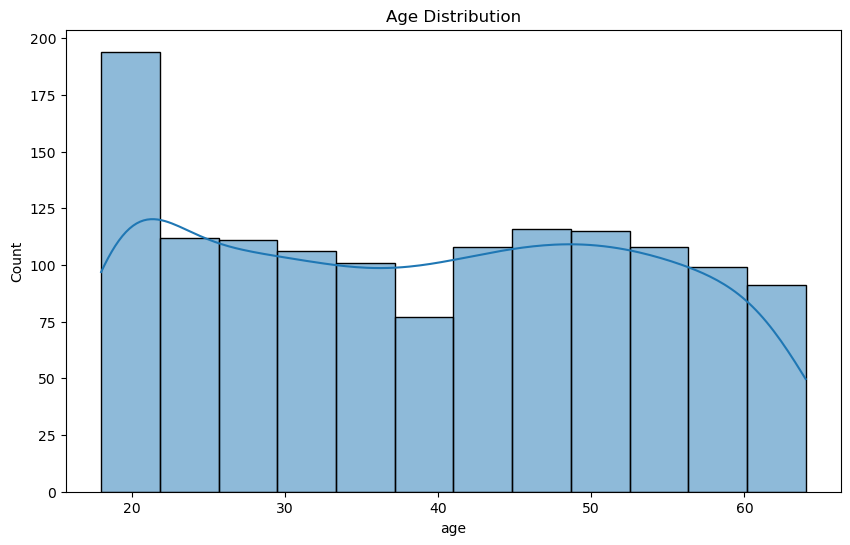

In [7]:
plt.figure(figsize = (10,6))
sns.histplot(df["age"], kde = True, bins = 12)
plt.title("Age Distribution")
plt.show()

<Axes: xlabel='bmi', ylabel='Count'>

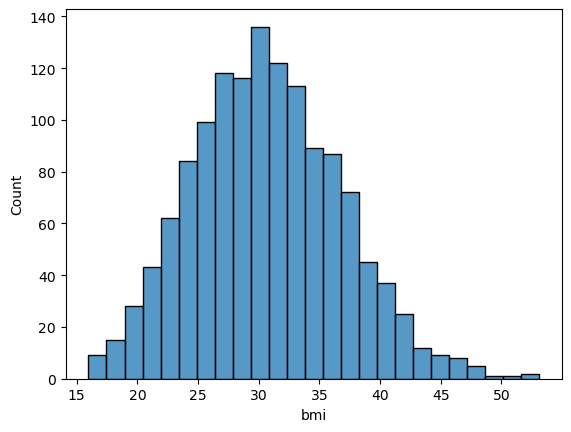

In [8]:
sns.histplot(df['bmi'])

<Axes: xlabel='charges', ylabel='Count'>

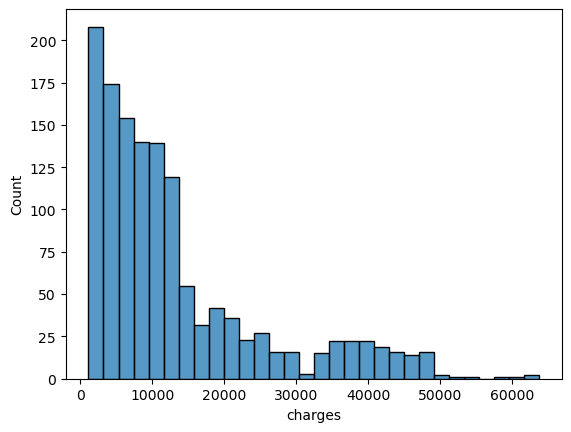

In [9]:
sns.histplot(df['charges'])

In [10]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [11]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [12]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

- 2 categories - Label Encoding
- more than 2 categories - One hot encoding
- One hot encoding for region column since it is nominal
 - Children column has more than 2 but it is ordinal 

In [13]:
#Encoding categorical variables:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])

In [14]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [15]:
#preventing dummy variable trap by dropping one category
df = pd.get_dummies(df, columns = ['region'], drop_first = True)

In [16]:
df

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,1,0,0
1334,18,0,31.920,0,0,2205.98080,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,1


<Axes: >

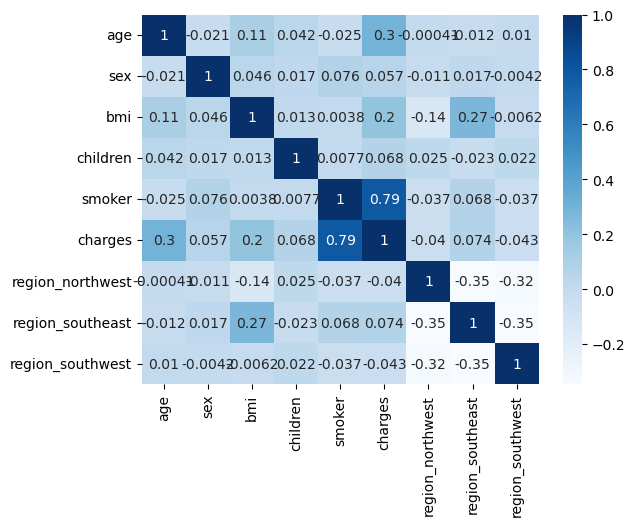

In [17]:
sns.heatmap(df.corr(),cmap = 'Blues', annot = True)

 - Smoking and charges are strongly correlated.
 - BMI and age are also positively correlated with the charges.

<Axes: xlabel='sex', ylabel='count'>

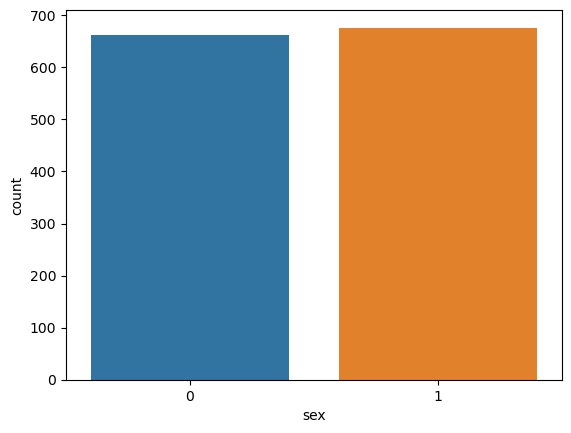

In [18]:
sns.countplot(x = 'sex', data=df)

0 - female
1 - male
 - no gender bias

<Axes: xlabel='smoker', ylabel='count'>

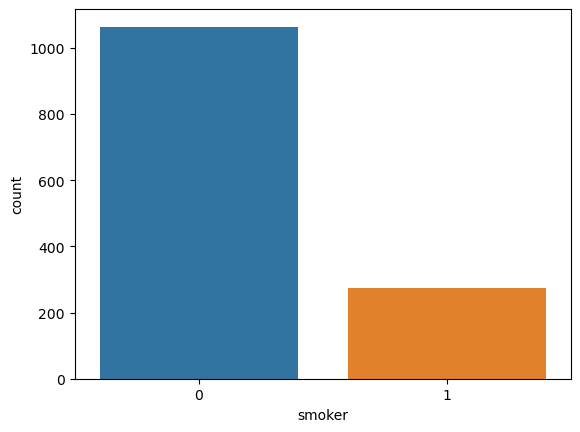

In [19]:
sns.countplot(x = 'smoker', data = df)

 - less amount of smokers

<Axes: xlabel='children', ylabel='count'>

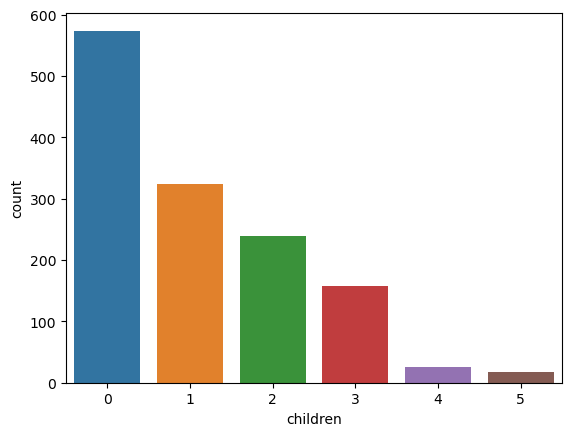

In [20]:
sns.countplot(x = 'children', data = df)

<Axes: xlabel='age', ylabel='charges'>

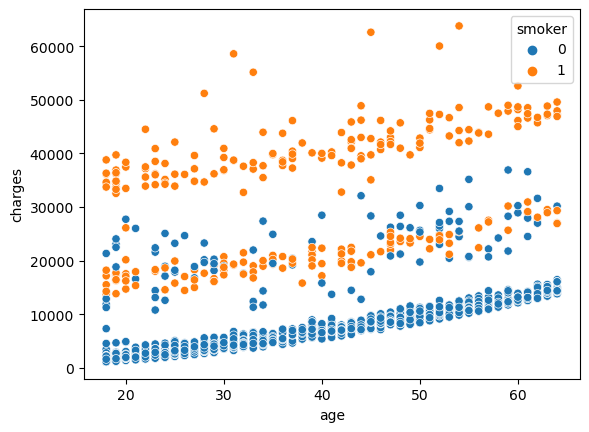

In [21]:
sns.scatterplot(x = 'age', y = 'charges', hue = 'smoker', data=df)

<Axes: xlabel='age', ylabel='charges'>

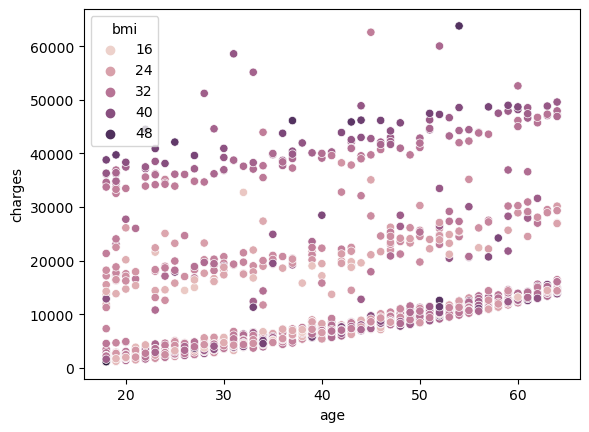

In [22]:
sns.scatterplot(x = 'age', y = 'charges', hue = 'bmi', data = df)

<Axes: xlabel='bmi', ylabel='charges'>

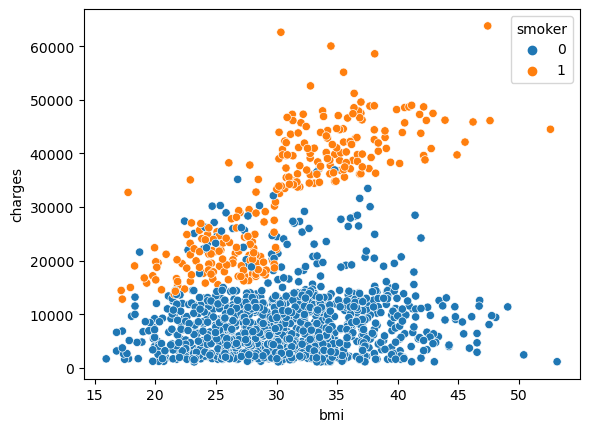

In [23]:
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = df)

 - more medical charges/expenses for smokers

<Axes: xlabel='smoker', ylabel='charges'>

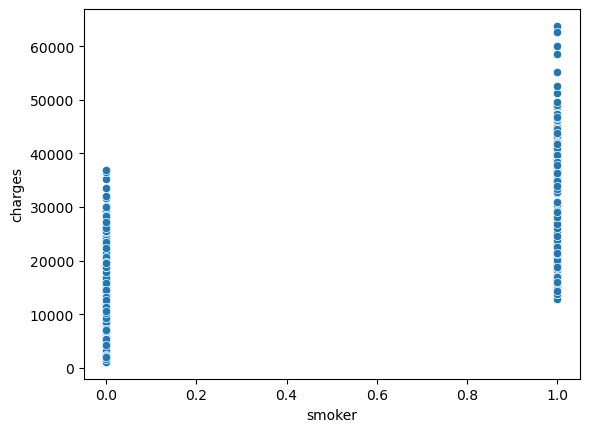

In [24]:
sns.scatterplot(x = 'smoker', y = 'charges', data = df)

 - more charges for smokers

<Axes: xlabel='sex', ylabel='charges'>

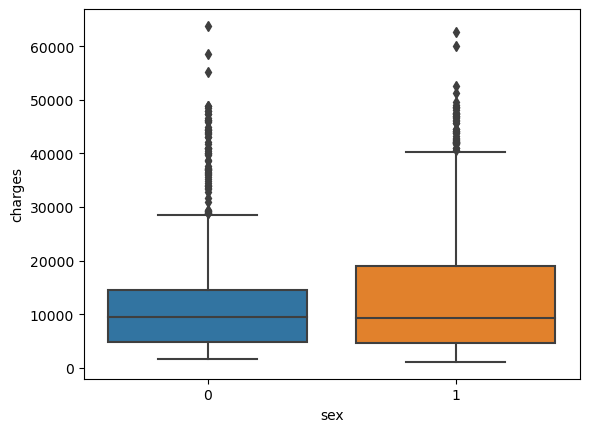

In [25]:
sns.boxplot(x = 'sex', y = 'charges', data = df)

In [26]:
df['smoker'].value_counts(normalize=True)

0    0.795217
1    0.204783
Name: smoker, dtype: float64

 - More non-smokers than smokers, oversampling might be needed

In [27]:
df

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,1,0,0
1334,18,0,31.920,0,0,2205.98080,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,1


In [28]:
X = df.drop('charges', axis = 1)
y = df['charges']

In [29]:
X

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,0,0
1334,18,0,31.920,0,0,0,0,0
1335,18,0,36.850,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,1


In [30]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [32]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred = model1.predict(X_test)

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", mean_squared_error(y_test, y_pred, squared = False))

MAE 4181.1944737536505
MSE 33596915.85136146
RMSE 5796.2846592762735


 - percentage error - (MAE/mean charges)*100
 - 31.5 percent 

In [35]:
#Feature engineering since bmi and smoker contributes more to charges
df['bmi_smoker'] = df['bmi'] * df['smoker']

In [36]:
df

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi_smoker
0,19,0,27.900,0,1,16884.92400,0,0,1,27.90
1,18,1,33.770,1,0,1725.55230,0,1,0,0.00
2,28,1,33.000,3,0,4449.46200,0,1,0,0.00
3,33,1,22.705,0,0,21984.47061,1,0,0,0.00
4,32,1,28.880,0,0,3866.85520,1,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,1,0,0,0.00
1334,18,0,31.920,0,0,2205.98080,0,0,0,0.00
1335,18,0,36.850,0,0,1629.83350,0,1,0,0.00
1336,21,0,25.800,0,0,2007.94500,0,0,1,0.00


<Axes: >

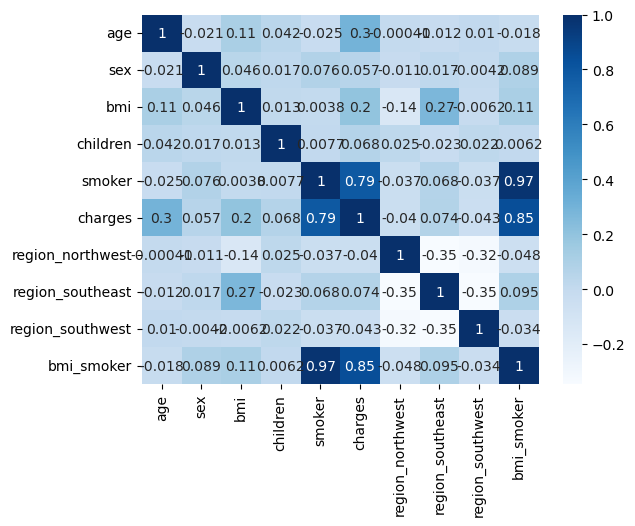

In [37]:
sns.heatmap(df.corr(),cmap = 'Blues', annot = True)

In [38]:
X = df.drop('charges', axis = 1)
y = df['charges']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [40]:
model1.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = model1.predict(X_test)

In [42]:
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", mean_squared_error(y_test, y_pred, squared = False))

MAE 2756.898659517963
MSE 20919716.751169
RMSE 4573.8076862903845


20 percent difference

Scaling age:

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df['age'] = scaler.fit_transform(df[['age']])

In [44]:
df

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi_smoker
0,-1.438764,0,27.900,0,1,16884.92400,0,0,1,27.90
1,-1.509965,1,33.770,1,0,1725.55230,0,1,0,0.00
2,-0.797954,1,33.000,3,0,4449.46200,0,1,0,0.00
3,-0.441948,1,22.705,0,0,21984.47061,1,0,0,0.00
4,-0.513149,1,28.880,0,0,3866.85520,1,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,1,30.970,3,0,10600.54830,1,0,0,0.00
1334,-1.509965,0,31.920,0,0,2205.98080,0,0,0,0.00
1335,-1.509965,0,36.850,0,0,1629.83350,0,1,0,0.00
1336,-1.296362,0,25.800,0,0,2007.94500,0,0,1,0.00


In [45]:
X = df.drop('charges', axis = 1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", mean_squared_error(y_test, y_pred, squared = False))

MAE 2756.898659517953
MSE 20919716.75116899
RMSE 4573.807686290384


no difference

In [46]:
#More feature engineering
df['age_bmi'] = df['age'] * df['bmi']
df['age_smoker'] = df['age'] *df['smoker']

In [47]:
df

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi_smoker,age_bmi,age_smoker
0,-1.438764,0,27.900,0,1,16884.92400,0,0,1,27.90,-40.141523,-1.438764
1,-1.509965,1,33.770,1,0,1725.55230,0,1,0,0.00,-50.991533,-0.000000
2,-0.797954,1,33.000,3,0,4449.46200,0,1,0,0.00,-26.332467,-0.000000
3,-0.441948,1,22.705,0,0,21984.47061,1,0,0,0.00,-10.034420,-0.000000
4,-0.513149,1,28.880,0,0,3866.85520,1,0,0,0.00,-14.819737,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,1,30.970,3,0,10600.54830,1,0,0,0.00,23.799598,0.000000
1334,-1.509965,0,31.920,0,0,2205.98080,0,0,0,0.00,-48.198097,-0.000000
1335,-1.509965,0,36.850,0,0,1629.83350,0,1,0,0.00,-55.642227,-0.000000
1336,-1.296362,0,25.800,0,0,2007.94500,0,0,1,0.00,-33.446136,-0.000000


<Axes: >

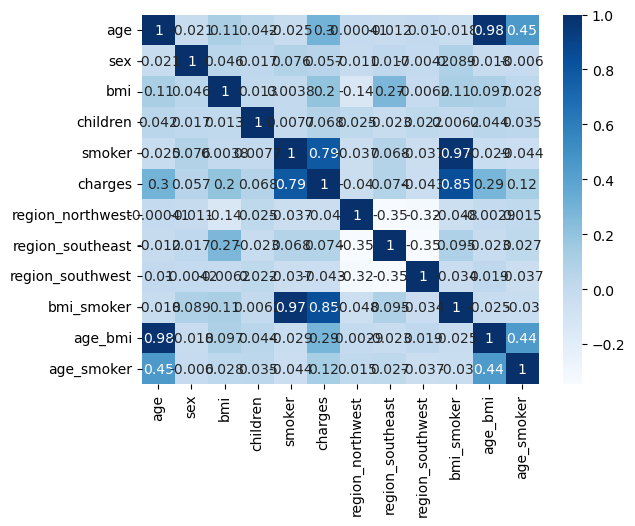

In [48]:
sns.heatmap(df.corr(),cmap = 'Blues', annot = True)

In [49]:
X = df.drop('charges', axis = 1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", mean_squared_error(y_test, y_pred, squared = False))

MAE 2699.591092554506
MSE 20195280.177733973
RMSE 4493.915906838263


20 percent difference

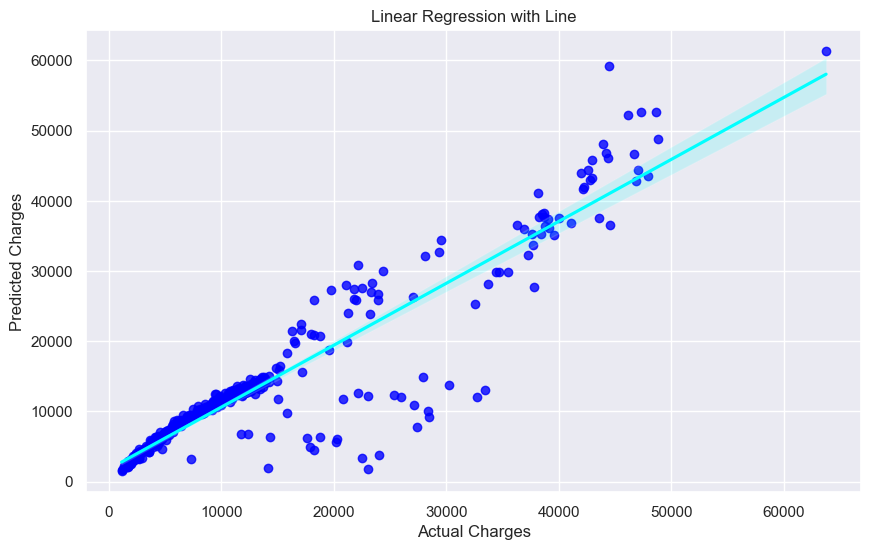

In [50]:
#Creating a graph to visualize the linear regression model
sns.set(style = "darkgrid")
plt.figure(figsize = (10, 6))
sns.regplot(x = y_test, y = y_pred,
            scatter_kws = {'color': 'blue'},
            line_kws = {'color': 'cyan'})
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Linear Regression with Line')
plt.show()

 - lower charges are predicted better. there may be some data imbalance

In [51]:
from sklearn.ensemble import RandomForestRegressor

X = df.drop('charges', axis = 1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model2 = RandomForestRegressor(random_state = 42)
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", mean_squared_error(y_test, y_pred, squared = False))

MAE 2486.133750606748
MSE 20767486.865915786
RMSE 4557.135818243273


In [52]:
mae = mean_absolute_error(y_test, y_pred)
mean_target = 13270
per_error = (mae/mean_target)*100
print(per_error)

18.73499435272606


In [53]:
df.describe()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi_smoker,age_bmi,age_smoker
count,1.338000e+03,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,-1.805565e-16,0.505232,30.663397,1.094918,0.204783,13270.422265,0.242900,0.272048,0.242900,6.288576,0.666111,-0.010096
std,1.000374e+00,0.500160,6.098187,1.205493,0.403694,12110.011237,0.428995,0.445181,0.428995,12.721374,31.476082,0.448404
min,-1.509965e+00,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,-80.224464,-1.509965
25%,-8.691547e-01,0.000000,26.296250,0.000000,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000,-26.062935,0.000000
50%,-1.474046e-02,1.000000,30.400000,1.000000,0.000000,9382.033000,0.000000,0.000000,0.000000,0.000000,-0.354471,0.000000
75%,8.396738e-01,1.000000,34.693750,2.000000,0.000000,16639.912515,0.000000,1.000000,0.000000,0.000000,25.656103,-0.000000
max,1.765289e+00,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000,52.580000,71.458911,1.765289


In [54]:
df

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi_smoker,age_bmi,age_smoker
0,-1.438764,0,27.900,0,1,16884.92400,0,0,1,27.90,-40.141523,-1.438764
1,-1.509965,1,33.770,1,0,1725.55230,0,1,0,0.00,-50.991533,-0.000000
2,-0.797954,1,33.000,3,0,4449.46200,0,1,0,0.00,-26.332467,-0.000000
3,-0.441948,1,22.705,0,0,21984.47061,1,0,0,0.00,-10.034420,-0.000000
4,-0.513149,1,28.880,0,0,3866.85520,1,0,0,0.00,-14.819737,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,1,30.970,3,0,10600.54830,1,0,0,0.00,23.799598,0.000000
1334,-1.509965,0,31.920,0,0,2205.98080,0,0,0,0.00,-48.198097,-0.000000
1335,-1.509965,0,36.850,0,0,1629.83350,0,1,0,0.00,-55.642227,-0.000000
1336,-1.296362,0,25.800,0,0,2007.94500,0,0,1,0.00,-33.446136,-0.000000


In [55]:
model1

LinearRegression()

In [56]:
model2

RandomForestRegressor(random_state=42)

In [57]:
X_test[:1]

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest,bmi_smoker,age_bmi,age_smoker
764,0.412467,0,25.175,2,0,0,0,0,0.0,10.383849,0.0


In [70]:
import warnings
warnings.filterwarnings(action='ignore', category = UserWarning)

In [73]:
import gradio as gr
import numpy as np

def predict_charges(age, sex, bmi, children, smoker, region):
    
    age = scaler.transform([[age]])[0][0]

    sex = 1 if sex == "Male" else 0
    
    smoker  = 1 if smoker == "Yes" else 0
    
    region_northwest = 1 if region == "northwest" else 0
    region_southeast = 1 if region == "southeast" else 0
    region_southwest = 1 if region == "southwest" else 0
    
    bmi_smoker = bmi*smoker
    age_bmi = age*bmi
    age_smoker = age*smoker
    
    input_data =  pd.DataFrame([[age, sex, bmi, children, smoker, region_northwest, region_southeast, region_southwest, bmi_smoker, age_bmi, age_smoker]],
                              columns =['age', 'sex', 'bmi', 'children', 'smoker', 'region_northwest', 'region_southeast', 'region_southwest', 'bmi_smoker', 'age_bmi', 'age_smoker'])
 
    charge = model2.predict(input_data)
    
    return charge[0]
    

with gr.Blocks() as interface:
    with gr.Row():
        gr.Markdown("<h1 style='text-align: center; padding-bottom: 20px;'>Annual Medical Expenditure Predictor</h1>")
    
    with gr.Row():
        age = gr.Slider(18,65, step = 1, label = "Age")
        sex = gr.Radio(choices =  ["Male", "Female"], label = "Sex")
        
    with gr.Row():        
        bmi = gr.Slider(15, 50, step = 0.1, label = "BMI")
        children = gr.Slider(0, 5, step = 1, label = "Number of Children")
        
    with gr.Row():        
        smoker = gr.Radio(choices = ["Yes", "No"], label = "Smoker")
        region = gr.Dropdown(choices = ["northwest", "southeast", "southwest", "northeast"], label = "Region")

    with gr.Row():
        submit_button = gr.Button("Predict Charges")        
        
    with gr.Row():
        output = gr.Textbox(label = "Predicted Annual Cost")
    

        
    submit_button.click(
    predict_charges,
    inputs = [age, sex, bmi, children, smoker, region],
    outputs = output
    )
    
    
interface.launch()

Running on local URL:  http://127.0.0.1:7870

To create a public link, set `share=True` in `launch()`.


<pre>
Improvements:
    - can use column transformer from sklearn.compose for one hot encoding and scaling
    - can do fit transform on X_train and X_test instead of doing on df
    - make a copy of df as df1 using deepcopy
 